# Comparaison of replacement policies

When the cache is at its and a new block has to be brought in the cache, a block already existing in the cache needs to be evicted. There are many ways to chose which block should be the one to be evicted. This is refered to as a replacement policy.

The most common replacement policies (and the ones experimented with here are):

**1. Random**

Random replacement policy is the simplest policy which randomly selects the block to be evicted. It works surpisingly well. However we can achieve better results by picking the block to be evicted more carefully.

**2. LRU (Least Recently Used)**

LRU is known to be one of the best performing algorithms to chose the block to be evicted. This is because it takes advantage of locality. When a block is accessed, it is likely to be accessed again in the near future. Therefore, it is more advantageous in most cases to evict the block that was accessed the longest time ago.

**3. FIFO (First In First Out)**

The main issue with LRU is the complexity of implementation in hardware. It is difficult to produce a true LRU cache eviction policy in practice. Therefore, FIFO which is an aproximation of LRU could be concidered.

In [84]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from glob import glob

replacement_policies = ['Random', 'LRU', 'FIFO']
results = {}

# For each policy, get the result files
for policy in replacement_policies:
    # Each plicy will have a list in the dictionary of results
    results[policy] = []
    for f_name in glob(os.path.join('..', 'cache_config', 'results', 'Eviction_Policy_Comparaison', policy, '*.json')):
        print(f_name)
        with open(f_name) as f:
            results[policy].append(json.load(f))
            f.close
        

../cache_config/results/Eviction_Policy_Comparaison/Random/compitomin_conf3_random.json
../cache_config/results/Eviction_Policy_Comparaison/Random/compitomin_conf1_random.json
../cache_config/results/Eviction_Policy_Comparaison/Random/compitomin_conf2_random.json
../cache_config/results/Eviction_Policy_Comparaison/LRU/compitomin_conf2_lru.json
../cache_config/results/Eviction_Policy_Comparaison/LRU/compitomin_conf1_lru.json
../cache_config/results/Eviction_Policy_Comparaison/LRU/compitomin_conf3_lru.json
../cache_config/results/Eviction_Policy_Comparaison/FIFO/compitomin_conf1_fifo.json
../cache_config/results/Eviction_Policy_Comparaison/FIFO/compitomin_conf2_fifo.json
../cache_config/results/Eviction_Policy_Comparaison/FIFO/compitomin_conf3_fifo.json


Now that we have loaded all result files, we can get the average for the AMAT across all configurations

In [85]:
def average(results, keyword):
    avrg = 0    
    for result in results:
        avrg += result[keyword]
        
    return avrg / len(results)
    

# Define the name of the variables of interest
interest_var = ['amat', 'amat_read', 'amat_write']
amat_results = {}

for var in interest_var:
    amat_results[var] = []
    for policy in replacement_policies:
        amat_results[var].append(average(results[policy], var))
    amat_results[var] = tuple(amat_results[var])
    

In [86]:
amat_results

{'amat': (21.594107967850135, 20.746376811594203, 22.55072463768116),
 'amat_read': (19.96141761970592, 19.36529680365297, 20.940639269406393),
 'amat_write': (54.0, 48.24242424242424, 54.6060606060606)}

The average AMAT have been computed for each replacement policy, they can now be graphed

amat values:
	amat_Random = 21.594107967850135 cycles
	amat_LRU = 20.746376811594203 cycles
	amat_FIFO = 22.55072463768116 cycles

amat_read values:
	amat_read_Random = 19.96141761970592 cycles
	amat_read_LRU = 19.36529680365297 cycles
	amat_read_FIFO = 20.940639269406393 cycles

amat_write values:
	amat_write_Random = 54.0 cycles
	amat_write_LRU = 48.24242424242424 cycles
	amat_write_FIFO = 54.6060606060606 cycles



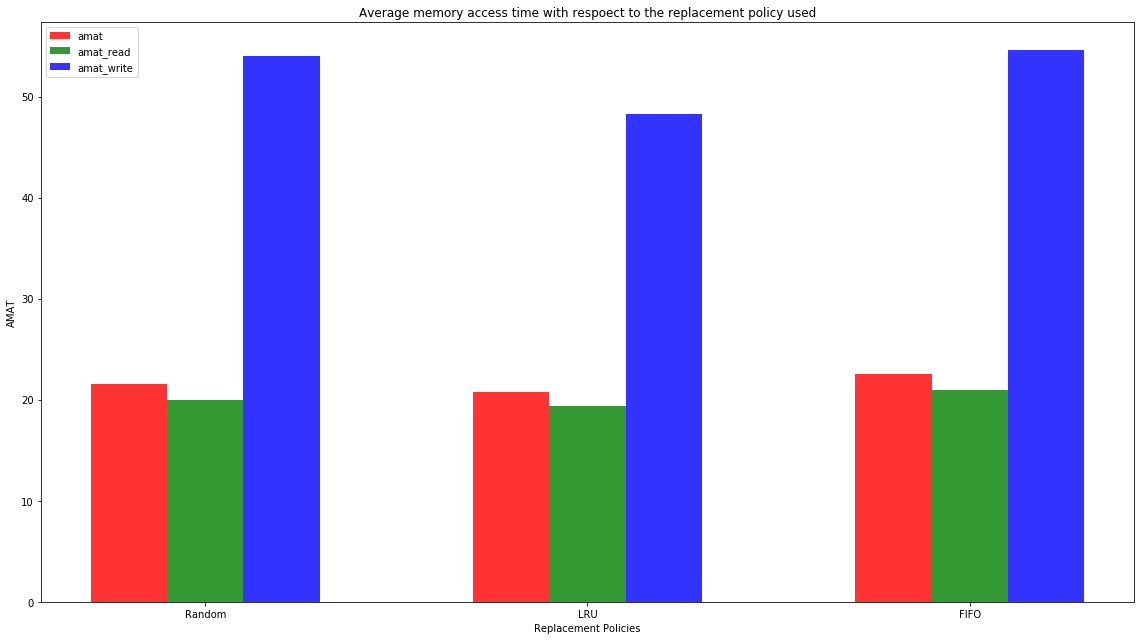

In [87]:
# data to plot
n_groups = len(replacement_policies)
colors = ['r', 'g', 'b']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

count = 0
for var in interest_var:
    print(var + " values:")
    for policy in replacement_policies:
        print('\t' + var + '_' + policy + " = " + str(amat_results[var][replacement_policies.index(policy)]) + ' cycles')
    plt.bar(index + count * bar_width, amat_results[var], bar_width,
        alpha=opacity,
        color=colors[count],
        label=var)
    count += 1
    print()

plt.xlabel('Replacement Policies')
plt.ylabel('AMAT')
plt.title('Average memory access time with respoect to the replacement policy used')
plt.xticks(index + bar_width, replacement_policies)
plt.legend()
 
plt.tight_layout()
plt.show()